# Module 8: Cluster Analysis w/ **'imdb_dataset.csv'**

The following tutorial contains Python examples for solving classification problems. You should refer to Chapters 7 and 8 of the "Introduction to Data Mining" book to understand some of the concepts introduced in this tutorial.

Cluster analysis seeks to partition the input data into groups of closely related instances so that instances that belong to the same cluster are more similar to each other than to instances that belong to other clusters. In this tutorial, we will provide examples of using different clustering techniques provided by the scikit-learn library package.

Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.


## K-means Clustering

The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into *k* disjoint clusters by iteratively applying the following two steps:
1. Form *k* clusters by assigning each instance to its nearest centroid.
2. Recompute the centroid of each cluster.

In this section, we perform k-means clustering on a sample IMDb dataset. We create the dataset with movie attributes such as genre, runtime, rating, and audience score, which serve as features for clustering.

In [ ]:
import pandas as pd

data = [
    ['Filly Brown', 'Feature Film', 'Drama', 80, 'R', 'Indomina Media Inc.', 2013, 4, 19, 2013, 7, 30, 5.5, 899, 'Rotten', 45, 'Upright', 73, 'no', 'no', 'no', 'no', 'no', 'no', 'Michael D. Olmos', 'Gina Rodriguez', 'Jenni Rivera', 'Lou Diamond Phillips', 'Emilio Rivera', 'Joseph Julian Soria', 'http://www.imdb.com/title/tt1869425/', '//www.rottentomatoes.com/m/filly_brown_2012/'],
    ['The Dish', 'Feature Film', 'Drama', 101, 'PG-13', 'Warner Bros. Pictures', 2001, 3, 14, 2001, 8, 28, 7.3, 12285, 'Certified Fresh', 96, 'Upright', 81, 'no', 'no', 'no', 'no', 'no', 'no', 'Rob Sitch', 'Sam Neill', 'Kevin Harrington', 'Patrick Warburton', 'Tom Long', 'Genevieve Mooy', 'http://www.imdb.com/title/tt0205873/', '//www.rottentomatoes.com/m/dish/'],
    ['The Age of Innocence', 'Feature Film', 'Drama', 139, 'PG', 'Columbia Pictures', 1993, 10, 1, 2001, 11, 6, 7.2, 35096, 'Certified Fresh', 80, 'Upright', 76, 'no', 'no', 'yes', 'no', 'yes', 'no', 'Martin Scorsese', 'Daniel Day-Lewis', 'Michelle Pfeiffer', 'Winona Ryder', 'Richard E. Grant', 'Alec McCowen', 'http://www.imdb.com/title/tt0106226/', '//www.rottentomatoes.com/m/age_of_innocence/']
]

columns = [
    'title', 'title_type', 'genre', 'runtime', 'mpaa_rating', 'studio',
    'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year', 'dvd_rel_month',
    'dvd_rel_day', 'imdb_rating', 'imdb_num_votes', 'critics_rating', 'critics_score',
    'audience_rating', 'audience_score', 'best_pic_nom', 'best_pic_win', 'best_actor_win',
    'best_actress_win', 'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2',
    'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url'
]
imdb_style_df = pd.DataFrame(data, columns=columns)
imdb_style_df


,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80,R,Indomina Media Inc.,2013,4,19,2013,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101,PG-13,Warner Bros. Pictures,2001,3,14,2001,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,The Age of Innocence,Feature Film,Drama,139,PG,Columbia Pictures,1993,10,1,2001,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/


In this example dataset, some movies belong to the Drama genre, while others belong to different genres. Our goal is to apply k-means clustering to identify groups of movies with similar characteristics, potentially revealing patterns in movie attributes like audience score, runtime, or rating.

The example below shows how to apply k-means clustering (with k=2) on the movie data. We remove non-numeric and categorical columns, such as "title" and "genre," before applying the clustering algorithm. The cluster assignment for each movie is displayed in a DataFrame, allowing us to interpret which clusters share similar attributes based on movie features.

In [ ]:
from sklearn import cluster

data = imdb_style_df[['runtime', 'imdb_rating', 'audience_score']].dropna()
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data)
labels = k_means.labels_
pd.DataFrame(labels, index=imdb_style_df['title'], columns=['Cluster ID'])

,Cluster ID
title,
Filly Brown,0
The Dish,0
The Age of Innocence,1


The k-means clustering algorithm assigns the first three users to one cluster and the last three users to the second cluster. The results are consistent with our expectation. We can also display the centroid for each of the two clusters.

In [ ]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,runtime,imdb_rating,audience_score
0,90.5,6.4,77.0
1,139.0,7.2,76.0


Observe that Cluster 0 contains movies with certain feature similarities (such as longer runtimes or higher audience scores), while Cluster 1 contains movies with different characteristics. The centroids of these clusters represent typical feature values for each group and can be applied to other movies to determine their cluster assignments based on similar attributes.

In [ ]:
import numpy as np
import pandas as pd

testData = np.array([
    [90, 6.8, 70],
    [120, 7.5, 85],
    [100, 5.2, 55],
    [105, 7.9, 80],
    [115, 6.0, 65]
])

labels = k_means.predict(testData)
labels = labels.reshape(-1, 1)

movie_titles = np.array(imdb_style_df['title'].tolist()[:5] + ["------"] * (5 - len(imdb_style_df['title'].tolist()[:5]))).reshape(-1, 1)

columns = ['title', 'runtime', 'imdb_rating', 'audience_score', 'Cluster ID']

new_movies = pd.DataFrame(np.concatenate((movie_titles, testData, labels), axis=1), columns=columns)
new_movies


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,title,runtime,imdb_rating,audience_score,Cluster ID
0,Filly Brown,90.0,6.8,70.0,0
1,The Dish,120.0,7.5,85.0,1
2,The Age of Innocence,100.0,5.2,55.0,0
3,------,105.0,7.9,80.0,0
4,------,115.0,6.0,65.0,1


To determine the number of clusters in the data, we can apply k-means with varying number of clusters from 1 to 6 and compute their corresponding sum-of-squared errors (SSE) as shown in the example below. The "elbow" in the plot of SSE versus number of clusters can be used to estimate the number of clusters.

Text(0, 0.5, 'SSE')

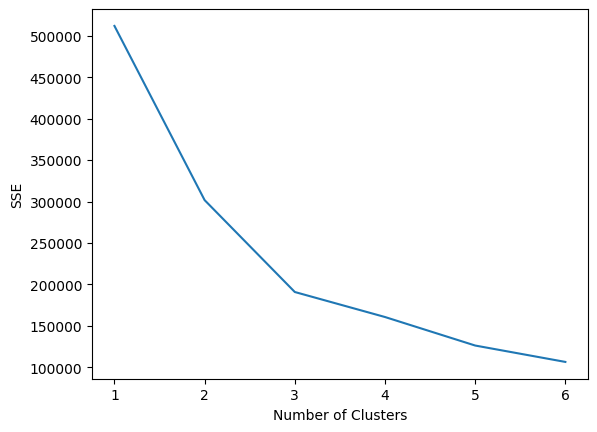

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

imdb_data = pd.read_csv('imdb_dataset.csv')

data = imdb_data[['runtime', 'imdb_rating', 'audience_score']].dropna()

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k, random_state=1)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## Hierarchical Clustering

This section demonstrates examples of applying hierarchical clustering to the vertebrate dataset used in Module 6 (Classification). Specifically, we illustrate the results of using 3 hierarchical clustering algorithms provided by the Python scipy library: (1) single link (MIN), (2) complete link (MAX), and (3) group average. Other hierarchical clustering algorithms provided by the library include centroid-based and Ward's method.

In [ ]:
import pandas as pd

data = pd.read_csv('imdb_dataset.csv',header='infer')
data

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,647,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,...,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
647,648,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,...,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
648,649,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,...,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
649,650,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,...,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


### Single Link (MIN)

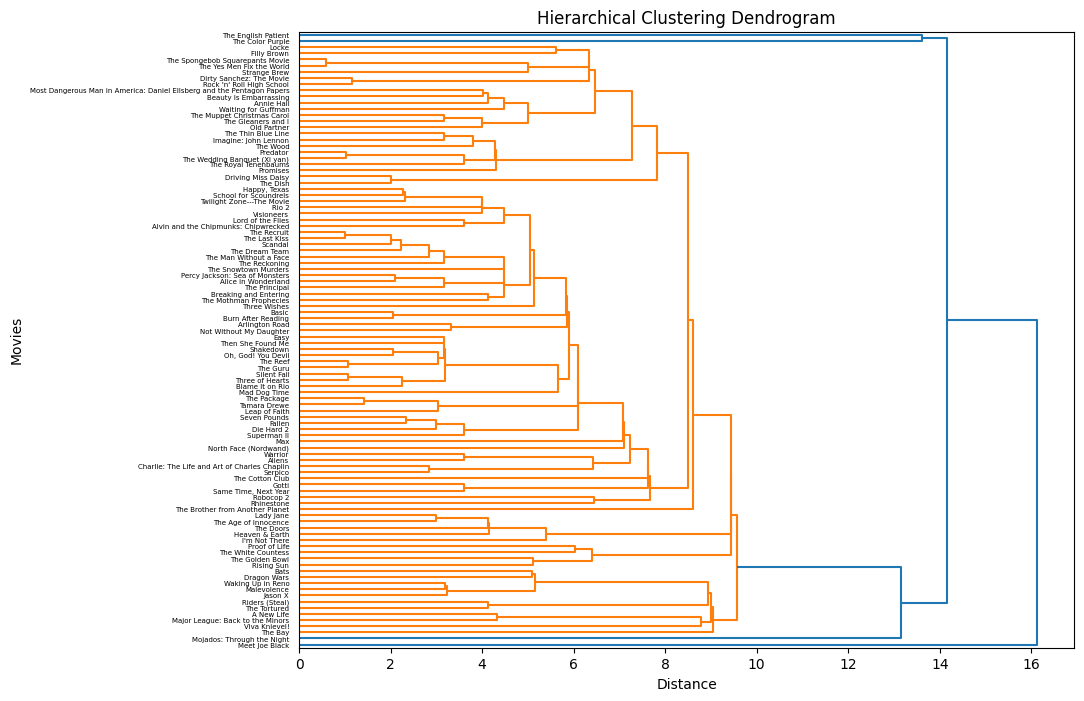

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

imdb_data = pd.read_csv('imdb_dataset.csv')

names = imdb_data['title']
X = imdb_data[['runtime', 'imdb_rating', 'audience_score']].dropna().head(100)
names = names[X.index]
Z = hierarchy.linkage(X.to_numpy(), 'single')
plt.figure(figsize=(10, 8))
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='right')

plt.xlabel('Distance')
plt.ylabel('Movies')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Complete Link (MAX)

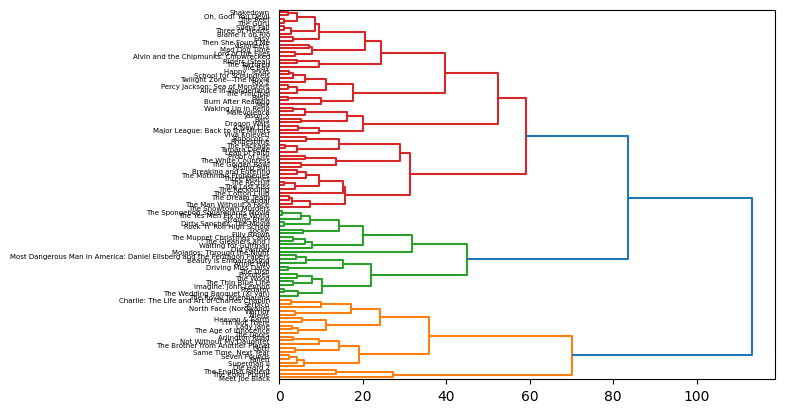

In [ ]:
Z_complete = hierarchy.linkage(X.to_numpy(), 'complete')
dn_complete = hierarchy.dendrogram(Z_complete, labels=names.tolist(), orientation='right')

### Group Average

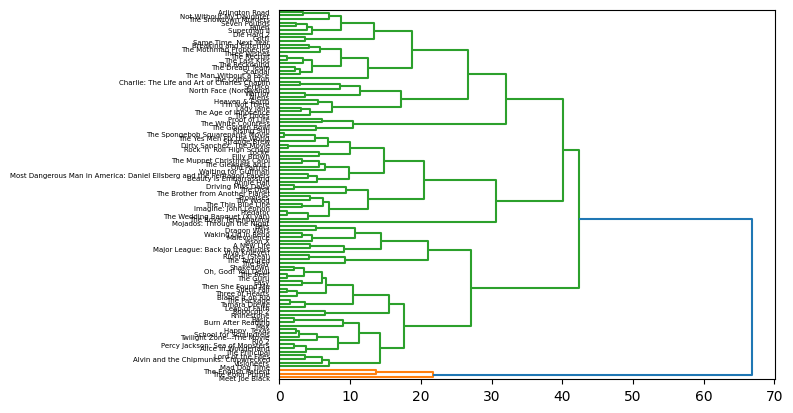

In [ ]:
Z_average = hierarchy.linkage(X.to_numpy(), 'average')
dn_average = hierarchy.dendrogram(Z_average, labels=names.tolist(), orientation='right')


## Density-Based Clustering

Density-based clustering identifies the individual clusters as high-density regions that are separated by regions of low density. DBScan is one of the most popular density based clustering algorithms. In DBScan, data points are classified into 3 types---core points, border points, and noise points---based on the density of their local neighborhood. The local neighborhood density is defined according to 2 parameters:  radius of neighborhood size (eps) and minimum number of points in the neighborhood (min_samples).

For this approach, we will use a noisy, 2-dimensional dataset originally created by Karypis et al. [1] for evaluating their proposed CHAMELEON algorithm. The example code shown below will load and plot the distribution of the data.

<Axes: title={'center': 'Runtime vs IMDb Rating'}, xlabel='runtime', ylabel='imdb_rating'>

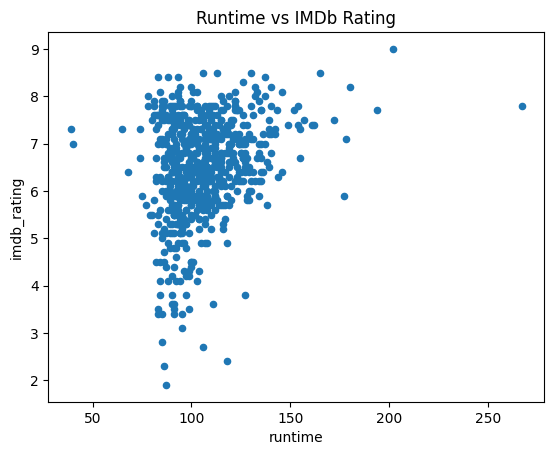

In [ ]:
import pandas as pd

imdb_data = pd.read_csv('imdb_dataset.csv')
data = imdb_data[['runtime', 'imdb_rating']].dropna()
data.plot.scatter(x='runtime', y='imdb_rating', title='Runtime vs IMDb Rating')

We apply the DBScan clustering algorithm on the data by setting the neighborhood radius (eps) to 15.5 and minimum number of points (min_samples) to be 5. The clusters are assigned to IDs between 0 to 8 while the noise points are assigned to a cluster ID equals to -1.

<Axes: title={'center': 'DBSCAN Clustering'}, xlabel='runtime', ylabel='imdb_rating'>

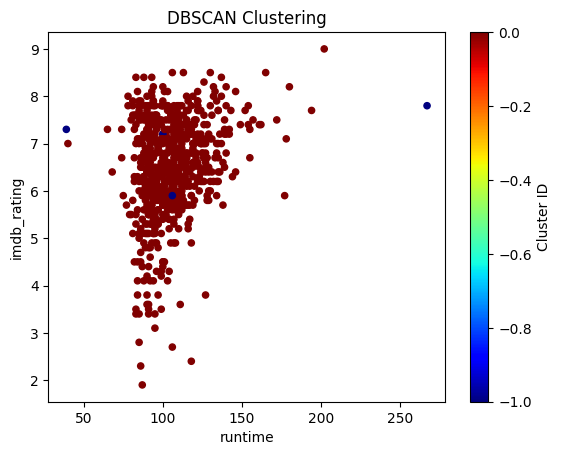

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='runtime', y='imdb_rating', c='Cluster ID', colormap='jet', title='DBSCAN Clustering')


## Spectral Clustering

One of the main limitations of the k-means clustering algorithm is its tendency to seek for globular-shaped clusters. Thus, it does not work when applied to datasets with arbitrary-shaped clusters or when the cluster centroids overlapped with one another. Spectral clustering can overcome this limitation by exploiting properties of the similarity graph to overcome such limitations. To illustrate this, consider the following two-dimensional datasets.

<Axes: title={'center': 'Runtime vs Audience Score'}, xlabel='x', ylabel='y'>

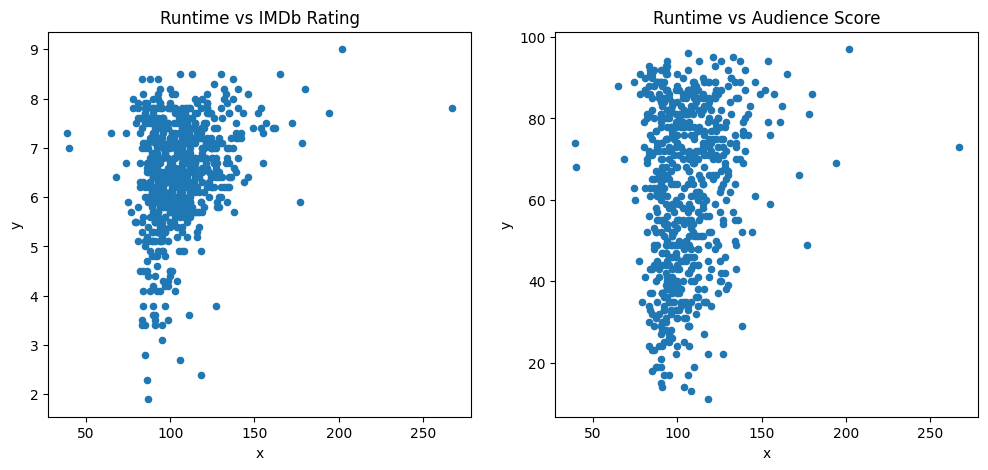

In [ ]:
import pandas as pd

imdb_data = pd.read_csv('imdb_dataset.csv')
data1 = imdb_data[['runtime', 'imdb_rating']].dropna()
data2 = imdb_data[['runtime', 'audience_score']].dropna()

data1.columns = ['x', 'y']
data2.columns = ['x', 'y']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
data1.plot.scatter(x='x', y='y', ax=ax1, title='Runtime vs IMDb Rating')
data2.plot.scatter(x='x', y='y', ax=ax2, title='Runtime vs Audience Score')

Below, we demonstrate the results of applying k-means to the datasets (with k=2).

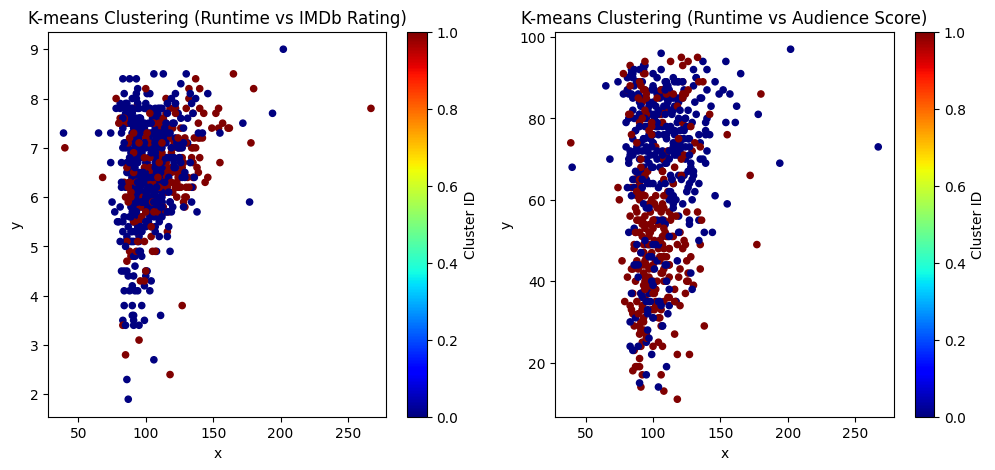

In [ ]:
from sklearn import cluster

imdb_data = pd.read_csv('imdb_dataset.csv')

data1 = imdb_data[['runtime', 'imdb_rating']].dropna()
data2 = imdb_data[['runtime', 'audience_score']].dropna()

data1.columns = ['x', 'y']
data2.columns = ['x', 'y']

k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data1)
labels1 = pd.DataFrame(k_means.labels_, columns=['Cluster ID'])
result1 = pd.concat((data1, labels1), axis=1)

k_means2 = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means2.fit(data2)
labels2 = pd.DataFrame(k_means2.labels_, columns=['Cluster ID'])
result2 = pd.concat((data2, labels2), axis=1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
result1.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax1)
ax1.set_title('K-means Clustering (Runtime vs IMDb Rating)')
result2.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax2)
ax2.set_title('K-means Clustering (Runtime vs Audience Score)')
plt.show()

The plots above show the poor performance of k-means clustering. Next, we apply spectral clustering to the datasets. Spectral clustering converts the data into a similarity graph and applies the normalized cut graph partitioning algorithm to generate the clusters. In the example below, we use the Gaussian radial basis function as our affinity (similarity) measure. Users need to tune the kernel parameter (gamma) value in order to obtain the appropriate clusters for the given dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


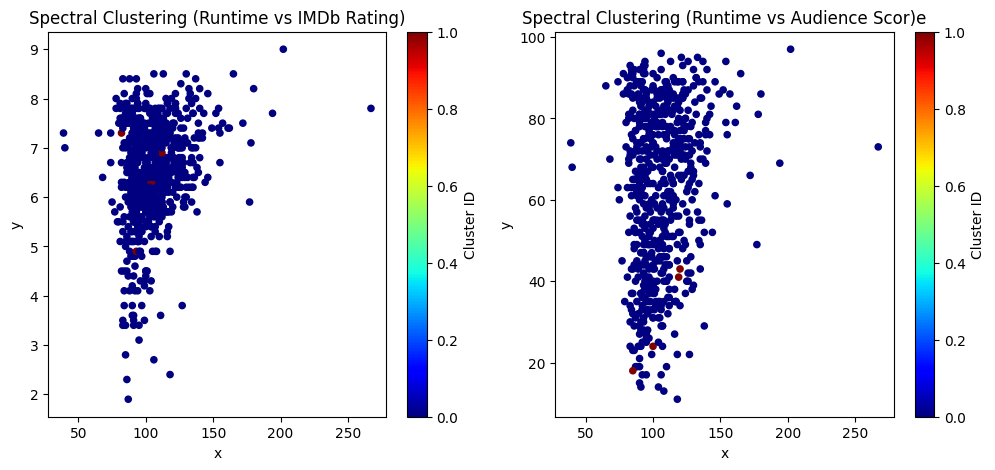

In [ ]:
from sklearn import cluster
import pandas as pd

imdb_data = pd.read_csv('imdb_dataset.csv')

data1 = imdb_data[['runtime', 'imdb_rating']].dropna()
data2 = imdb_data[['runtime', 'audience_score']].dropna()

data1.columns = ['x', 'y']
data2.columns = ['x', 'y']

spectral = cluster.SpectralClustering(n_clusters=2, random_state=1, affinity='rbf', gamma=5000)
spectral.fit(data1)
labels1 = pd.DataFrame(spectral.labels_, columns=['Cluster ID'])
result1 = pd.concat((data1, labels1), axis=1)

spectral2 = cluster.SpectralClustering(n_clusters=2, random_state=1, affinity='rbf', gamma=100)
spectral2.fit(data2)
labels2 = pd.DataFrame(spectral2.labels_, columns=['Cluster ID'])
result2 = pd.concat((data2, labels2), axis=1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
result1.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax1)
ax1.set_title('Spectral Clustering (Runtime vs IMDb Rating)')
result2.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax2)
ax2.set_title('Spectral Clustering (Runtime vs Audience Scor)e')
plt.show()